## Créditos

Autor: Santiago Ontañón Sánchez

El siguiente tutorial está basado en un tutorial de Steven Brandt que dio en el *2017 North American Einstien Toolkit School and Workshop at NCSA*. La versión original está disponible [aquí](https://github.com/stevenrbrandt/CactusTutorial).

In [1]:
# Para usar los comandos del sistema operativo, importamos os.
import os

![cactus](http://cactuscode.org/global/images/cactuslogo.png)

# Compilación de Cactus

Si quieres empezar desde cero este tutorial, basta que corras las siguientes líneas (descoméntalas primero por seguridad).

In [2]:
#%cd ~
#!rm -rf ~/CactusTutorial
#!rm -rf ~/simulations

## Prerequisitos

Antes de compilar Cactus deben de cumplir con los prerequisitos, como son los compiladores de C, Fortran y las implementaciones de MPI y OpenMP. Para Debian/Ubuntu se pueden obtener con el siguiente comando.

```console
sudo apt-get install -y subversion gcc git numactl libgsl-dev libpapi-dev python libhwloc-dev make libopenmpi-dev libhdf5-openmpi-dev libfftw3-dev libssl-dev liblapack-dev g++ curl gfortran patch pkg-config libhdf5-dev libjpeg-turbo?-dev
```

Si no está funcionando bien `apt-get`, puede que se arregle corriendo

```console
sudo apt-get update
sudo apt-get install -f
```

y luego la línea de arriba.

## Descarga del código

El primer paso es bajar el código. La mejor manera de hacer esto es usar un script especial para Cactus llamado `GetComponents` para bajar y preparar sólo los módulos que necesitamos. Bajar `GetComponents` se hace con un simple llamado al comando del sistema `curl`.

Para propósitos técnicos que puedan surgir, vale la pena conocer su versión de Python. La recomendada es la de Anaconda en versión 2.7 disponible [aquí](https://www.anaconda.com/download/#linux). Aunque también puede servir la versión de Intel.

In [3]:
!python --version

Python 2.7.14 :: Intel Corporation


Vamos a trabajar en un directorio llamado `CactusTutorial` dentro de su directorio hogar.

**Nota**: La tilde "~" es una abreviatura para tu directorio hogar en UNIX. Es decir, si haces

```console
cd ~
```

terminarás en tu directorio hogar. Esta abreviatura se usará en toda esta notebook para escibir rutas de directorios.

In [4]:
# Las líneas que empiezan con % son comandos dentro de Jupyter llamados magics.
%mkdir -p ~/CactusTutorial
%cd ~/CactusTutorial

/home/santiago/CactusTutorial


Ahora sí conseguimos el script `GetComponents`:

In [5]:
%cd ~/CactusTutorial
!curl -kLO https://raw.githubusercontent.com/gridaphobe/CRL/ET_2018_02/GetComponents

/home/santiago/CactusTutorial
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   99k  100   99k    0     0   151k      0 --:--:-- --:--:-- --:--:--  151k


Como se dijo antes, este script sirve para bajar módulos o *thorns* específicos. Por lo tanto, se requiere una lista de estos thorns. Por ejemplo, la lista de thorns del Einstien Toolkit está [aquí](https://bitbucket.org/einsteintoolkit/manifest/raw/ET_2018_02/einsteintoolkit.th). Pero para este ejemplo vamos a utilizar **FunWave**, que es una serie de thorns diseñados para simular ondas de agua con las ecuaciones de [Boussinesq](https://en.wikipedia.org/wiki/Boussinesq_approximation_(water_waves).

In [6]:
%cd ~/CactusTutorial
!curl -kLO https://bitbucket.org/stevenrbrandt/cajunwave/raw/master/funwave_carpet.th

/home/santiago/CactusTutorial
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3994  100  3994    0     0   7054      0 --:--:-- --:--:-- --:--:--  7069


Podemos ver el contenido de esta lista con el comando `cat`.

Nótese en particular que se tiene en las primeras líneas "DEFINE ROOT = CactusFW2". Esto significa que Cactus se instalará en dicho directorio.

In [7]:
%cd ~/CactusTutorial
%cat funwave_carpet.th

/home/santiago/CactusTutorial
# This file was automatically generated using the GetComponents script.

!CRL_VERSION = 2.0


# Component list: funwave.th

!DEFINE ROOT = CactusFW2
!DEFINE ARR = $ROOT/arrangements
!DEFINE ET_RELEASE = trunk
!DEFINE FW_RELEASE = FW_2014_05

#Cactus Flesh
!TARGET   = $ROOT
!TYPE     = git
!URL      = https://bitbucket.org/cactuscode/cactus.git
!NAME     = flesh
!CHECKOUT = CONTRIBUTORS COPYRIGHT doc lib Makefile src

!TARGET   = $ARR
!TYPE     = git
!URL      = https://bitbucket.org/stevenrbrandt/cajunwave.git
!REPO_PATH= $2
# Old version
#!AUTH_URL = https://svn.cct.lsu.edu/repos/projects/ngchc/code/branches/$FW_RELEASE/$1/$2
#!URL = https://svn.cct.lsu.edu/repos/projects/ngchc/code/branches/$FW_RELEASE/$2
#!URL = https://svn.cct.lsu.edu/repos/projects/ngchc/code/CactusCoastal/$2
!CHECKOUT =
CactusCoastal/Funwave
CactusCoastal/FunwaveMesh
CactusCoastal/FunwaveCoord
CactusCoastal/Tridiagonal
CactusCoastal/Tridiagonal2

# CactusBase thorns
!TARGET   = $ARR


Con todo lo anterior ya podemos bajar los componentes requeridos. No hay que olvidar que debemos de darle permiso de ejecución a `GetComponents` primero.

In [8]:
%cd ~/CactusTutorial
!chmod u+x GetComponents
!./GetComponents --parallel funwave_carpet.th

/home/santiago/CactusTutorial
-----------------------------------------------------------------
  Checking out module: ExternalLibraries/OpenBLAS
      from repository: https://svn.cactuscode.org/projects/ExternalLibraries/OpenBLAS/trunk
                 into: CactusFW2/arrangements
-----------------------------------------------------------------
  Checking out module: CONTRIBUTORS
      from repository: https://bitbucket.org/cactuscode/cactus.git
                 into: CactusFW2
                   as: flesh
-----------------------------------------------------------------
  Checking out module: CactusUtils/Accelerator
      from repository: https://bitbucket.org/cactuscode/cactusutils.git
                 into: CactusFW2/arrangements
-----------------------------------------------------------------
  Checking out module: AEIThorns/AEILocalInterp
      from repository: https://bitbucket.org/cactuscode/numerical.git
                 into: CactusFW2/arrangements
------------------------

-----------------------------------------------------------------
  Checking out module: COPYRIGHT
      from repository: https://bitbucket.org/cactuscode/cactus.git
                 into: CactusFW2
                   as: flesh
-----------------------------------------------------------------
  Checking out module: doc
      from repository: https://bitbucket.org/cactuscode/cactus.git
                 into: CactusFW2
                   as: flesh
-----------------------------------------------------------------
  Checking out module: lib
      from repository: https://bitbucket.org/cactuscode/cactus.git
                 into: CactusFW2
                   as: flesh
-----------------------------------------------------------------
  Checking out module: Makefile
      from repository: https://bitbucket.org/cactuscode/cactus.git
                 into: CactusFW2
                   as: flesh
-----------------------------------------------------------------
  Checking out module: src
      fr

Por último, cambiamos de directorio a `CactusFW2`.

In [9]:
%cd ~/CactusTutorial/CactusFW2

/home/santiago/CactusTutorial/CactusFW2


<img src="http://simfactory.org/global/images/factory.png" width="200px">

## Simfactory
Cactus se compila con una herramienta auxiliar llamada Simfactory. Es decir, no se compila con el uso típico de `make`, sino que Simfactory va a llamar a `make` por su propia cuenta. Sin embargo, Simfactory debe ser configurado de acuerdo a la máquina sobre la que está corriendo. Primero, Simfactory va a intentar detectar si la máquina en la que estamos corriendo es una maquina que conoce, i.e. está en su base de datos. Esto no va a ser cierto para nosotros, así que va a copiar la configuración de una máquina genérica.

In [10]:
%cd ~/CactusTutorial/CactusFW2
# La opción de poner su email no es requerida. Puede ser usada para mandar notificaciones de cuando haya terminado de correr una simulación.
!./simfactory/bin/sim setup-silent --setup-email=santiago.ontanon@nucleares.unam.mx

/home/santiago/CactusTutorial/CactusFW2
Unknown machine name santiago-inspiron


Here we will define some necessary Simulation Factory defaults.


Determining local machine name: santiago-inspiron
Creating machine santiago-inspiron from generic: machine santiago-inspiron [/home/santiago/CactusTutorial/CactusFW2/repos/simfactory2/mdb/machines/santiago-inspiron.ini] created successfully

--------------------SUMMARY--------------------:


[default]
user            = santiago
email           = santiago.ontanon@nucleares.unam.mx
allocation      = NO_ALLOCATION


------------------END SUMMARY------------------:

Contents successfully written to /home/santiago/CactusTutorial/CactusFW2/repos/simfactory2/etc/defs.local.ini


Nuestra configuración está escrita en un archivo con el nombre de nuestra máquina. Podríamos editarla, sobre todo para cambiar el *directorio de salida* de las simulaciones y otras opciones de número de procesadores. Por el momento no se hará esto.

## OptionLists: configuración de compiladores, optimización y MPI

Estamos más cerca de poder compilar Cactus. Simfactory normalmente puede averiguar qué compiladores, opciones y banderas utilizar. Sin embargo, esto se puede especificar si se da una lista de opciones. Para ejemplos de listas se puede examinar el siguiente directorio.

In [11]:
%ls ~/CactusTutorial/CactusFW2/simfactory/mdb/optionlists

acrcluster.cfg       gpc.cfg                   raspbian.cfg
angel.cfg            guillimin.cfg             requin.cfg
bethe.cfg            holodeck.cfg              saw.cfg
bluewaters-cray.cfg  hydra.cfg                 sciama.cfg
bluewaters-gnu.cfg   intrepid-xlc.cfg          shelob-mpich.cfg
bluewaters-pgi.cfg   jacobi-uwm.cfg            shelob-mvapich.cfg
centos.cfg           loewe.cfg                 shelob-openmpi.cfg
cfermi.cfg           marconiA1.cfg             shelob-openmpi-gcc.cfg
comet.cfg            marconiA2.cfg             s-kraken.cfg
compute.cfg          marconiA3.cfg             sl6.cfg
compute-intel.cfg    marenostrum-openmpi.cfg   smic-openmpi.cfg
cori.cfg             mike-openmpi.cfg          stampede2-knl.cfg
cygwin.cfg           mike-openmpi-gcc.cfg      stampede2-skx.cfg
debian.cfg           mike-openmpi-pgi-acc.cfg  sunnyvale.cfg
debian-cuda.cfg      minerva.cfg               supermuc-ibmmpi.cfg
debian-intel.cfg     mp2.cfg                   supermuc-intelmpi.c

Por ejemplo, se podría dar un vistazo a la lista para Ubuntu. Véase en particular las primeras líneas que listan los prerequisitos.

In [12]:
%cat ~/CactusTutorial/CactusFW2/simfactory/mdb/optionlists/ubuntu.cfg

# Configuration for an Ubuntu installation, assuming the following
# list of packages is installed:
#
#    build-essential perl python gfortran g++ libmpich-dev
#
# In addition, installing the following list of packaed will prevent
# Cactus from compiling its own versions of these libraries:
#
#   libfftw3-dev libgsl-dev libatlas-base-dev libjpeg-dev libssl-dev 
#   libhdf5-dev hdf5-tools libnuma-dev libltdl-dev libhwloc-dev zlib1g-dev
#
# Tools like GetComponents and Simfactory like to have the following list
# installed too
#
#   python subversion git

# Whenever this version string changes, the application is configured 
# and rebuilt from scratch 
VERSION = 2012-09-28

CPP = cpp
FPP = cpp
CC  = gcc
CXX = g++
F77 = gfortran
F90 = gfortran

CPPFLAGS = -DMPICH_IGNORE_CXX_SEEK
FPPFLAGS = -traditional
CFLAGS   = -g3 -march=native -std=gnu99
CXXFLAGS = -g3 -march=native -std=gnu++0x
F77FLAGS = -g3 -march=native -fcray-pointer -ffixed-line-length-none -fno-range-check
F90FLAGS = -g3 -marc

¿Por qué es tan importante conocer estas listas de configuraciones? Porque aquí están todas las banderas y especificaciones de su sistema como dónde están las librerías de MPI, OpenMP, BLAS, etc. Simfactory puede compilar y enlazar estas librerías sin que ustedes las tengan. **¡Pero si ya las tienen a veces deben especificarlas!** Sobre todo si se trata de herramientas propietarias como son los compiladores de Intel y otras versiones de MPI.

La versión de MPI es particularmente importante. Cactus por default corre con OpenMPI. Vean su versión de MPI primero.

In [13]:
!mpirun --version

Intel(R) MPI Library for Linux* OS, Version 2018 Update 2 Build 20180125 (id: 18157)
Copyright 2003-2018 Intel Corporation.


Si la salida anterior no es algo del estilo:

```console
mpirun (Open MPI) 1.10.2

Report bugs to http://www.open-mpi.org/community/help/
```

van a tener que editar el `RunScript` más adelante. Independientemente de eso, si se instalaron los prerequisitos correctamente, sí se debería tener OpenMPI corriendo:

In [14]:
!/usr/bin/mpirun --version

mpirun (Open MPI) 1.10.2

Report bugs to http://www.open-mpi.org/community/help/


## Compilación al fin

La compilación de Cactus se hace con el siguiente comando. La opción '-j' dice que se va a compilar con dos procesadores. **Hay peligro de compilar erróneamente si se compila con demasiados procesadores**. Si se quiere dar una lista de opciones específicas se utiliza el comando '--optionlist=list_name.cfg'.

*Si se quiere limpiar por completo la compilación y empezar se cero, se pasa la opción '--clean'.*
Esto es particularmente útil si están teniendo errores al compilar.

In [15]:
%cd ~/CactusTutorial/CactusFW2/
# Vamos a compilar con dos procesadores y usando la lista de opciones de Ubuntu. Si no tienes Ubuntu,
# prueba compilar con la lista generic.cfg
!time ./simfactory/bin/sim build -j 2 --thornlist=./repos/cajunwave/funwave_carpet.th --optionlist=ubuntu.cfg

/home/santiago/CactusTutorial/CactusFW2
Using configuration: sim
Reconfiguring sim
Writing configuration to: /home/santiago/CactusTutorial/CactusFW2/configs/sim/OptionList
Cactus - version: 4.2.3
Reconfiguring sim.
Adding configuration options from '/home/santiago/CactusTutorial/CactusFW2/configs/sim/OptionList'...
  Setting VERSION to '2012-09-28'
  Setting CPP to 'cpp'
  Setting FPP to 'cpp'
  Setting CC to 'gcc'
  Setting CXX to 'g++'
  Setting F77 to 'gfortran'
  Setting F90 to 'gfortran'
  Setting CPPFLAGS to '-DMPICH_IGNORE_CXX_SEEK'
  Setting FPPFLAGS to '-traditional'
  Setting CFLAGS to '-g3 -march=native -std=gnu99'
  Setting CXXFLAGS to '-g3 -march=native -std=gnu++0x'
  Setting F77FLAGS to '-g3 -march=native -fcray-pointer -ffixed-line-length-none -fno-range-check'
  Setting F90FLAGS to '-g3 -march=native -fcray-pointer -ffixed-line-length-none -fno-range-check'
  Setting LDFLAGS to '-rdynamic'
  Setting LIBDIRS to ''
  Setting C_LINE_DIRECTIVES to 'yes'
  Setting F_LINE_DI

checking for Fortran REAL*16... yes
checking for Fortran COMPLEX*8... yes
checking for Fortran COMPLEX*16... yes
checking for Fortran COMPLEX*32... yes
checking for cxxabi.h... yes
checking for __cxa_demangle... yes
checking for Dl_info.dli_sname... yes
checking for dladdr... no
checking for dladdr in library dl... yes
checking for backtrace... yes
checking for backtrace_symbols... yes
checking for crypt... no
checking for crypt in library crypt... yes
checking for finite in header math.h and library m... yes
checking for copysign in header math.h and library m... yes
checking for fpclassify in header math.h and library m... yes
checking for isfinite in header math.h and library m... yes
checking for isinf in header math.h and library m... yes
checking for isnan in header math.h and library m... yes
checking for isnormal in header math.h and library m... yes
checking for signbit in header math.h and library m... yes
checking for mkstemp... yes
checking for va_copy... yes
creating cctk_

   AEILocalInterp
          0 Global, 0 Restricted, 1 Private parameters
   Boundary
          0 Global, 8 Restricted, 0 Private parameters
   Cactus
          0 Global, 6 Restricted, 13 Private parameters
   Carpet
          0 Global, 4 Restricted, 94 Private parameters
   CarpetEvolutionMask
          0 Global, 0 Restricted, 6 Private parameters
   CarpetIOASCII
          0 Global, 0 Restricted, 63 Private parameters
   CarpetIOBasic
          0 Global, 0 Restricted, 15 Private parameters
   CarpetIOHDF5
          0 Global, 0 Restricted, 77 Private parameters
   CarpetIOScalar
          0 Global, 0 Restricted, 9 Private parameters
   CarpetInterp
          0 Global, 0 Restricted, 5 Private parameters
   CarpetInterp2
          0 Global, 0 Restricted, 3 Private parameters
   CarpetLib
          0 Global, 5 Restricted, 31 Private parameters
   CarpetMask
          0 Global, 0 Restricted, 8 Private parameters
   CarpetReduce
          0 Global, 0 Restricted, 3 Private parameters
   Carp

COMPILING arrangements/AEIThorns/AEILocalInterp/src/Lagrange-tensor-product/1d.cube.order3.smooth0.c
COMPILING arrangements/AEIThorns/AEILocalInterp/src/Lagrange-tensor-product/1d.cube.order4.smooth0.c
COMPILING arrangements/AEIThorns/AEILocalInterp/src/Lagrange-tensor-product/1d.cube.order5.smooth0.c
COMPILING arrangements/AEIThorns/AEILocalInterp/src/Lagrange-tensor-product/1d.cube.order6.smooth0.c
COMPILING arrangements/AEIThorns/AEILocalInterp/src/Lagrange-tensor-product/2d.cube.order1.smooth0.c
COMPILING arrangements/AEIThorns/AEILocalInterp/src/Lagrange-tensor-product/2d.cube.order2.smooth0.c
COMPILING arrangements/AEIThorns/AEILocalInterp/src/Lagrange-tensor-product/2d.cube.order3.smooth0.c
COMPILING arrangements/AEIThorns/AEILocalInterp/src/Lagrange-tensor-product/2d.cube.order4.smooth0.c
COMPILING arrangements/AEIThorns/AEILocalInterp/src/Lagrange-tensor-product/3d.cube.order1.smooth0.c
COMPILING arrangements/AEIThorns/AEILocalInterp/src/Lagrange-tensor-product/3d.cube.order2.

COMPILING arrangements/Carpet/CarpetLib/src/cacheinfo.cc
COMPILING arrangements/Carpet/CarpetLib/src/commstate.cc
COMPILING arrangements/Carpet/CarpetLib/src/data.cc
COMPILING arrangements/Carpet/CarpetLib/src/defs.cc
COMPILING arrangements/Carpet/CarpetLib/src/dh.cc
COMPILING arrangements/Carpet/CarpetLib/src/dist.cc
COMPILING arrangements/Carpet/CarpetLib/src/fulltree.cc
COMPILING arrangements/Carpet/CarpetLib/src/gdata.cc
COMPILING arrangements/Carpet/CarpetLib/src/gf.cc
COMPILING arrangements/Carpet/CarpetLib/src/ggf.cc
COMPILING arrangements/Carpet/CarpetLib/src/gh.cc
COMPILING arrangements/Carpet/CarpetLib/src/limits.cc
COMPILING arrangements/Carpet/CarpetLib/src/mem.cc
COMPILING arrangements/Carpet/CarpetLib/src/memstat.cc
COMPILING arrangements/Carpet/CarpetLib/src/mpi_string.cc
COMPILING arrangements/Carpet/CarpetLib/src/region.cc
COMPILING arrangements/Carpet/CarpetLib/src/startup_time.cc
COMPILING arrangements/Carpet/CarpetLib/src/th.cc
COMPILING arrangements/Carpet/CarpetLi

COMPILING configs/sim/bindings/build/CarpetIOBasic/cctk_ThornBindings.c
Creating /home/santiago/CactusTutorial/CactusFW2/configs/sim/lib/libthorn_CarpetIOBasic.a
Checking status of thorn HDF5
COMPILING configs/sim/bindings/build/HDF5/cctk_ThornBindings.c
Creating /home/santiago/CactusTutorial/CactusFW2/configs/sim/lib/libthorn_HDF5.a
Checking status of thorn CarpetIOHDF5
COMPILING arrangements/Carpet/CarpetIOHDF5/src/CarpetIOHDF5.cc
COMPILING arrangements/Carpet/CarpetIOHDF5/src/Input.cc
COMPILING arrangements/Carpet/CarpetIOHDF5/src/Output.cc
COMPILING arrangements/Carpet/CarpetIOHDF5/src/OutputSlice.cc
/home/santiago/CactusTutorial/CactusFW2/arrangements/Carpet/CarpetIOHDF5/src/OutputSlice.cc: In instantiation of ‘static int CarpetIOHDF5::IOHDF5<outdim>::WriteHDF5(const cGH*, hid_t&, hid_t&, std::vector<gdata*>, const bbox<int, 3>&, int, const vect<int, 3>&, const vect<int, outdim>&, int, int, int, int, int, int, CCTK_REAL8, const vect<double, 3>&, const vect<double, 3>&) [with int o

Checking status of thorn CarpetReduce
COMPILING arrangements/Carpet/CarpetReduce/src/mask_allocate.cc
COMPILING arrangements/Carpet/CarpetReduce/src/mask_init.cc
COMPILING arrangements/Carpet/CarpetReduce/src/mask_set.cc
COMPILING arrangements/Carpet/CarpetReduce/src/mask_test.cc
COMPILING arrangements/Carpet/CarpetReduce/src/mask_carpet.cc
COMPILING arrangements/Carpet/CarpetReduce/src/mask_coords.cc
COMPILING arrangements/Carpet/CarpetReduce/src/reduce.cc
COMPILING configs/sim/bindings/build/CarpetReduce/cctk_ThornBindings.c
Creating /home/santiago/CactusTutorial/CactusFW2/configs/sim/lib/libthorn_CarpetReduce.a
Checking status of thorn CarpetRegrid
COMPILING arrangements/Carpet/CarpetRegrid/src/automatic.cc
COMPILING arrangements/Carpet/CarpetRegrid/src/baselevel.cc
COMPILING arrangements/Carpet/CarpetRegrid/src/centre.cc
COMPILING arrangements/Carpet/CarpetRegrid/src/manualcoordinatelist.cc
COMPILING arrangements/Carpet/CarpetRegrid/src/manualcoordinates.cc
COMPILING arrangements/C

COMPILING arrangements/CactusCoastal/Funwave/src/molregister.cc
COMPILING arrangements/CactusCoastal/Funwave/src/fluxes.cc
COMPILING arrangements/CactusCoastal/Funwave/src/sourceterms.cc
COMPILING arrangements/CactusCoastal/Funwave/src/sponge.cc
COMPILING arrangements/CactusCoastal/Funwave/src/dispersion.cc
COMPILING arrangements/CactusCoastal/Funwave/src/estimate_dt.cc
COMPILING arrangements/CactusCoastal/Funwave/src/wavemaker.cc
/home/santiago/CactusTutorial/CactusFW2/arrangements/CactusCoastal/Funwave/src/wavemaker.cc: In function ‘void funwave_wavemaker_irregular_wave(cGH*)’:
/home/santiago/CactusTutorial/CactusFW2/arrangements/CactusCoastal/Funwave/src/wavemaker.cc:347:29: warning: ‘wave_length’ may be used uninitialized in this function [-Wmaybe-uninitialized]
  width=delta*wave_length/2.0;
                             ^
/home/santiago/CactusTutorial/CactusFW2/arrangements/CactusCoastal/Funwave/src/wavemaker.cc: In function ‘void funwave_wavemaker_wkreg(cGH*)’:
/home/santiago/Cac

COMPILING configs/sim/bindings/build/InitBase/cctk_ThornBindings.c
Creating /home/santiago/CactusTutorial/CactusFW2/configs/sim/lib/libthorn_InitBase.a
Checking status of thorn InterpToArray
COMPILING arrangements/CactusNumerical/InterpToArray/src/interp.c
COMPILING configs/sim/bindings/build/InterpToArray/cctk_ThornBindings.c
Creating /home/santiago/CactusTutorial/CactusFW2/configs/sim/lib/libthorn_InterpToArray.a
Checking status of thorn LocalInterp
COMPILING arrangements/CactusNumerical/LocalInterp/src/Startup.c
COMPILING arrangements/CactusNumerical/LocalInterp/src/Operator.c
COMPILING arrangements/CactusNumerical/LocalInterp/src/Interpolate.c
COMPILING configs/sim/bindings/build/LocalInterp/cctk_ThornBindings.c
Creating /home/santiago/CactusTutorial/CactusFW2/configs/sim/lib/libthorn_LocalInterp.a
Checking status of thorn LocalReduce
COMPILING arrangements/CactusNumerical/LocalReduce/src/Startup.c
COMPILING arrangements/CactusNumerical/LocalReduce/src/Reduction.c
COMPILING arrange

COMPILING configs/sim/bindings/build/TestLoopControl/cctk_ThornBindings.c
Creating /home/santiago/CactusTutorial/CactusFW2/configs/sim/lib/libthorn_TestLoopControl.a
Checking status of thorn Time
COMPILING arrangements/CactusBase/Time/src/Courant.c
COMPILING arrangements/CactusBase/Time/src/Given.c
COMPILING arrangements/CactusBase/Time/src/Initialise.c
COMPILING arrangements/CactusBase/Time/src/Simple.c
COMPILING configs/sim/bindings/build/Time/cctk_ThornBindings.c
Creating /home/santiago/CactusTutorial/CactusFW2/configs/sim/lib/libthorn_Time.a
Checking status of thorn Tridiagonal
COMPILING arrangements/CactusCoastal/Tridiagonal/src/tridiagonalx.cc
COMPILING arrangements/CactusCoastal/Tridiagonal/src/tridiagonaly.cc
COMPILING configs/sim/bindings/build/Tridiagonal/cctk_ThornBindings.c
Creating /home/santiago/CactusTutorial/CactusFW2/configs/sim/lib/libthorn_Tridiagonal.a
Checking status of thorn Tridiagonal2
COMPILING arrangements/CactusCoastal/Tridiagonal2/src/trid.cc
COMPILING arran

COMPILING src/util/RegisterKeyedFunction.c
COMPILING src/util/StoreKeyedData.c
COMPILING src/util/StoreNamedData.c
COMPILING src/util/Misc.c
COMPILING src/util/StoreHandledData.c
COMPILING src/util/SKBinTree.c
COMPILING src/util/Hash.c
COMPILING src/util/Malloc.c
COMPILING src/util/Math.c
COMPILING src/util/String.c
COMPILING src/util/StringList.c
COMPILING src/util/Table.c
COMPILING src/util/Time.c
COMPILING src/util/Network.c
COMPILING src/main/ActiveThorns.c
COMPILING src/main/Banner.c
COMPILING src/main/CactusDefaultInitialise.c
COMPILING src/main/CactusDefaultEvolve.c
COMPILING src/main/CactusDefaultShutdown.c
COMPILING src/main/CactusDefaultMainLoopIndex.c
COMPILING src/main/CallStartupFunctions.c
COMPILING src/main/CommandLine.c
COMPILING src/main/Complex.c
COMPILING src/main/ConfigData.c
COMPILING src/main/Coord.c
COMPILING src/main/DebugDefines.c
COMPILING src/main/DefaultTimers.c
COMPILING src/main/Dummies.c
COMPILING src/main/flesh.cc
COMPILING src/main/FortranWrappers.c
COM

COMPILING configs/sim/bindings/Parameters/Tridiagonal2_Parameters.c
COMPILING configs/sim/bindings/Parameters/Vectors_Parameters.c
COMPILING configs/sim/bindings/Parameters/hwloc_Parameters.c
COMPILING configs/sim/bindings/Parameters/zlib_Parameters.c
COMPILING configs/sim/bindings/Variables/BindingsVariables.c
COMPILING configs/sim/bindings/Variables/AEILocalInterp.c
COMPILING configs/sim/bindings/Variables/Boundary.c
COMPILING configs/sim/bindings/Variables/Cactus.c
COMPILING configs/sim/bindings/Variables/Carpet.c
COMPILING configs/sim/bindings/Variables/CarpetEvolutionMask.c
COMPILING configs/sim/bindings/Variables/CarpetIOASCII.c
COMPILING configs/sim/bindings/Variables/CarpetIOBasic.c
COMPILING configs/sim/bindings/Variables/CarpetIOHDF5.c
COMPILING configs/sim/bindings/Variables/CarpetIOScalar.c
COMPILING configs/sim/bindings/Variables/CarpetInterp.c
COMPILING configs/sim/bindings/Variables/CarpetInterp2.c
COMPILING configs/sim/bindings/Variables/CarpetLib.c
COMPILING configs/si

Compiling /home/santiago/CactusTutorial/CactusFW2/arrangements/Carpet/CarpetIOHDF5/src/util/hdf5tobinary_slicer.cc
Creating hdf5tobinary_slicer in /home/santiago/CactusTutorial/CactusFW2/exe/sim from /home/santiago/CactusTutorial/CactusFW2/configs/sim/build/CarpetIOHDF5/hdf5tobinary_slicer.o
Compiling /home/santiago/CactusTutorial/CactusFW2/arrangements/Carpet/CarpetIOHDF5/src/util/hdf5_slicer.cc
Creating hdf5_slicer in /home/santiago/CactusTutorial/CactusFW2/exe/sim from /home/santiago/CactusTutorial/CactusFW2/configs/sim/build/CarpetIOHDF5/hdf5_slicer.o
Compiling /home/santiago/CactusTutorial/CactusFW2/arrangements/Carpet/CarpetIOHDF5/src/util/hdf5_recombiner.cc
Creating hdf5_recombiner in /home/santiago/CactusTutorial/CactusFW2/exe/sim from /home/santiago/CactusTutorial/CactusFW2/configs/sim/build/CarpetIOHDF5/hdf5_recombiner.o
Compiling /home/santiago/CactusTutorial/CactusFW2/arrangements/ExternalLibraries/HDF5/src/util/hdf5_merge.c
Creating hdf5_merge in /home/santiago/CactusTutor

Al final de la compilación debe salir algo del estilo:

```
Done.
387.99user 17.12system 6:59.48elapsed 96%CPU (0avgtext+0avgdata 532648maxresident)k
5296inputs+3499800outputs (14major+17937793minor)pagefaults 0swaps
```

La información de la compilación se guarda en el directorio "configs/sim"

In [16]:
%ls ~/CactusTutorial/CactusFW2/configs/sim/

bindings/     config-info  OptionList      RunScript     ThornList
build/        datestamp.o  piraha/         scratch/
config-data/  lib/         properties.ini  SubmitScript


En particular, está la lista de thorns, de opciones y el script con el que vamos a correr el ejecutable más adelante.

## Archivo de parámetros
A continuación vamos a correr una simple onda gaussiana sobre un fondo plano de agua. Vamos a utilizar MPI con dos 
procesos. Para establecer los parámetros de la simulación debemos escribir un archivo de parámetros "ExampleWave1.par". Ahora no importa tanto entender todos los parámetros pero vale la pena ir viendo la forma del archivo.

In [17]:
%%writefile ~/CactusTutorial/CactusFW2/ExampleWave1.par

#Aquí se listan los thorns activos durante la simulación.
ActiveThorns = "
  CoordBase FunWave FunwaveCoord CartGrid3D Carpet CarpetIOASCII
  CartGrid3D IOUtil CarpetIOBasic CarpetSlab Boundary SymBase MoL
  CarpetReduce LocalReduce InitBase CarpetLib LoopControl Tridiagonal
  CarpetIOScalar "

#----------------------------------------------------
# Parámetros Flesh y CCTK
#----------------------------------------------------

# Flesh
Cactus::cctk_run_title = "FunWave Simulation"
Cactus::cctk_show_schedule = "yes"
Cactus::cctk_itlast = 300
Cactus::allow_mixeddim_gfs = "yes"

# Malla cartesiana CartGrid3D
CartGrid3D::type = "coordbase"
CartGrid3D::avoid_origin = "no"
CoordBase::domainsize = "minmax"
CoordBase::spacing    = "gridspacing"
CoordBase::xmin =  0
CoordBase::xmax =  30
CoordBase::ymin =  0
CoordBase::ymax =  30
CoordBase::zmin =  0.0
CoordBase::zmax =  0.0
CoordBase::dx   =  0.25
CoordBase::dy   =  0.25

CoordBase::boundary_size_x_lower     = 3
CoordBase::boundary_size_x_upper     = 3
CoordBase::boundary_size_y_lower     = 3
CoordBase::boundary_size_y_upper     = 3
CoordBase::boundary_size_z_lower     = 0
CoordBase::boundary_size_z_upper     = 0
CoordBase::boundary_shiftout_x_lower = 1
CoordBase::boundary_shiftout_x_upper = 1
CoordBase::boundary_shiftout_y_lower = 1
CoordBase::boundary_shiftout_y_upper = 1
CoordBase::boundary_shiftout_z_lower = 1
CoordBase::boundary_shiftout_z_upper = 1

# Carpet: malla AMR.
Carpet::domain_from_coordbase = "yes"
Carpet::ghost_size_x = 3
Carpet::ghost_size_y = 3
Carpet::ghost_size_z = 1
carpet::adaptive_stepsize = yes

# Integración por MoL (Method of Lines).
MoL::ODE_Method = "RK3"
MoL::disable_prolongation = "yes"

# Salida. Directorio nombrado como el arhcivo de parámetros.
IO::out_dir = $parfile
IO::out_fileinfo="none"
# Salida básica a pantalla. Frecuencia y variables.
IOBasic::outInfo_every = 1
IOBasic::outInfo_vars = "FunWave::eta FunWave::u FunWave::v"

# Salida ASCII. Frecuencia y variables. Tipo 1D y 2D.
#IOASCII::out1D_every = 1
#IOASCII::out1d_vars = "FunWave::eta Funwave::depth"
CarpetIOASCII::compact_format = false
IOASCII::out2D_every = 30
IOASCII::out2D_xyplane_z = 0
IOASCII::out2D_vars = "FunWave::eta FunWave::u FunWave::v"
IOASCII::out2D_xz = "no"
IOASCII::out2D_yz = "no"
IOASCII::output_ghost_points = "no"

IOScalar::outScalar_every = 1
IOScalar::outScalar_vars = "FunWave::eta FunWave::u FunWave::v"
        
# Salida HDF5.
#ActiveThorns = "CarpetIOHDF5"
#IOHDF5::out2D_xyplane_z = 0 
#IOHDF5::out2D_every = 10
#IOHDF5::out2D_vars = " 
#  FunWave::eta
#  FunWave::u
#  FunWave::v
#  Grid::Coordinates{out_every=1000000000}
#"
#IOHDF5::out2D_xz = no
#IOHDF5::out2D_yz = no

#----------------------------------------------------
# Parámetros para Funwave.
#----------------------------------------------------

# Funwave depth.
FunWave::depth_file_offset_x = 3
FunWave::depth_file_offset_y = 3
FunWave::depth_type = "flat"
FunWave::depth_format = "ele"
FunWave::depth_file = "/tmp/__depth__.txt"
FunWave::depth_flat = 0.8
#Funwave::test_depth_shore_x = 80
#Funwave::test_depth_island_x = 40
#Funwave::test_depth_island_y = 40
FunWave::depth_xslp = 10.0
FunWave::depth_slope = 0.05
FunWave::dt_size = 0
Funwave::generate_test_depth_data = true
Funwave::num_wave_components = 1
Funwave::wave_component_file = "/home/sbrandt/workspace/shi_funwave/example_2/fft/wavemk_per_amp_pha.txt"
Funwave::peak_period = 1

# import
Funwave::time_ramp = 1.0
Funwave::delta_wk = 0.5
Funwave::dep_wk = 0.45
Funwave::xc_wk = 3.0
Funwave::ywidth_wk = 10000.0
Funwave::tperiod = 1.0
Funwave::amp_wk = 0.0232
Funwave::theta_wk = 0.0
Funwave::freqpeak = 0.2
Funwave::freqmin = 0.1
Funwave::freqmax = 0.4
Funwave::hmo = 1.0
Funwave::gammatma = 5.0
Funwave::thetapeak = 10.0
Funwave::sigma_theta = 15.0

# Funwave wind forcing
Funwave::wind_force = false
Funwave::use_wind_mask = false
Funwave::num_time_wind_data = 2
Funwave::timewind[0] = 0
Funwave::wu[0] = 25
Funwave::wv[0] = 50
Funwave::timewind[1] = 1000
Funwave::wu[1] = 100
Funwave::wv[1] = 100
Funwave::boundary = funwave

# Funwave wave maker
FunWave::wavemaker_type = "ini_gau"
FunWave::xc = 26.5
FunWave::yc = 26.9
FunWave::amp =  2.0
FunWave::wid =  1
Funwave::wdep = 0.78
Funwave::xwavemaker = 25.0

# Funwave sponge 
FunWave::sponge_on = false
FunWave::sponge_west_width = 2.0
FunWave::sponge_east_width = 2.0
FunWave::sponge_north_width = 0.0
FunWave::sponge_south_width = 0.0
FunWave::sponge_decay_rate = 0.9
FunWave::sponge_damping_magnitude = 5.0

# Funwave dispersion (example 3 enables dispersion)
FunWave::dispersion_on = "true"
FunWave::gamma1 = 1.0
FunWave::gamma2 = 1.0
FunWave::gamma3 = 1.0
FunWave::beta_ref = -0.531
FunWave::swe_eta_dep = 0.80
FunWave::cd = 0.0

# Funwave numerics (MoL parameter controls time integration scheme)
FunWave::reconstruction_scheme = "fourth"
FunWave::riemann_solver = "HLLC"
FunWave::dtfac = 0.5
FunWave::froudecap = 10.0
FunWave::mindepth = 0.001
FunWave::mindepthfrc = 0.001
FunWave::enable_masks = "true"
Funwave::estimate_dt_on = "true"

FunwaveCoord::spherical_coordinates = false

Writing /home/santiago/CactusTutorial/CactusFW2/ExampleWave1.par


## Cómo correr Cactus

Por fin estamos listos para correr Cactus. Esta configuración va a correr con dos procesos con un hilo por proceso. La ejecución se hace con un "RunScript" que está en configs/sim/Runscript. Básicamente, este script llama a MPI y asigna el número de procesos adecuadamente.

Como se anticipó antes, si `mpirun --version` no dio la versión de OpenMPI, es necesario editar este archivo. Esta edición también la puedes hacer aún si sí tienes OpenMPI, ya que no hará ninguna diferencia.

La línea que cambia es la que dice
```
    /usr/bin/mpirun -np @NUM_PROCS@ @EXECUTABLE@ -L 3 @PARFILE@
```

Esto lo que hace es que asegura que corra OpenMPI y no otra versión.

In [18]:
%%writefile ~/CactusTutorial/CactusFW2/configs/sim/RunScript

#!/bin/sh

echo "Preparing:"
set -x                          # Output commands
set -e                          # Abort on errors

cd @RUNDIR@-active

echo "Checking:"
pwd
hostname
date

echo "Environment:"
export CACTUS_NUM_PROCS=@NUM_PROCS@
export CACTUS_NUM_THREADS=@NUM_THREADS@
export GMON_OUT_PREFIX=gmon.out
export OMP_NUM_THREADS=@NUM_THREADS@
env | sort > SIMFACTORY/ENVIRONMENT

echo "Starting:"
export CACTUS_STARTTIME=$(date +%s)

if [ ${CACTUS_NUM_PROCS} = 1 ]; then
    if [ @RUNDEBUG@ -eq 0 ]; then
   	  @EXECUTABLE@ -L 3 @PARFILE@
    else
   	  gdb --args @EXECUTABLE@ -L 3 @PARFILE@
    fi
else
    /usr/bin/mpirun -np @NUM_PROCS@ @EXECUTABLE@ -L 3 @PARFILE@
fi

echo "Stopping:"
date
echo "Done."

Overwriting /home/santiago/CactusTutorial/CactusFW2/configs/sim/RunScript


La siguiente celda borra alguna simulación preexistente. Esto será relevante cuando queramos repetirla. Es decir, **Cactus no puede hacer la misma simulación dos veces** por seguridad. Es necesario cambiar el nombre del archivo de parámetros, cambiar el nombre del directorio de salida o borrarlo y volver a correr de cero.

In [19]:
%cd ~/CactusTutorial/CactusFW2
!rm -rf ~/simulations/ExampleWave1

/home/santiago/CactusTutorial/CactusFW2


Todo listo en teoría, ¡vamos a correr Cactus!

In [20]:
# Corriendo con 2 procesos en total. 1 hilo de OpenMP por proceso de MPI: 2 procesos de MPI.
!time ~/CactusTutorial/CactusFW2/simfactory/bin/sim create-run --procs 2 --num-threads 1 ExampleWave1.par

Parameter file: /home/santiago/CactusTutorial/CactusFW2/ExampleWave1.par
Skeleton Created
Job directory: "/home/santiago/simulations/ExampleWave1"
Executable: "/home/santiago/CactusTutorial/CactusFW2/exe/cactus_sim"
Option list: "/home/santiago/simulations/ExampleWave1/SIMFACTORY/cfg/OptionList"
Submit script: "/home/santiago/simulations/ExampleWave1/SIMFACTORY/run/SubmitScript"
Run script: "/home/santiago/simulations/ExampleWave1/SIMFACTORY/run/RunScript"
Parameter file: "/home/santiago/simulations/ExampleWave1/SIMFACTORY/par/ExampleWave1.par"
Simulation name: ExampleWave1
Assigned restart id: 0 
Running simulation ExampleWave1
Preparing:
++ set -e
++ cd /home/santiago/simulations/ExampleWave1/output-0000-active
++ echo Checking:
Checking:
++ pwd
/home/santiago/simulations/ExampleWave1/output-0000-active
++ hostname
santiago-inspiron
++ date
jue may 17 11:15:41 CDT 2018
++ echo Environment:
Environment:
++ export CACTUS_NUM_PROCS=2
++ CACTUS_NUM_PROCS=2
++ export CACTUS_NUM_THREADS=1


INFO (CycleClock): Calibrated CycleClock: 0.385795 ns per clock tick (2.59205 GHz)
  ____       _          __        __              
 / ___|__ _ (_)_   _ _ _\ \      / /_ ___   _____ 
| |   / _` || | | | | '_ \ \ /\ / / _` \ \ / / _ \
| |__| (_| || | |_| | | | \ V  V / (_| |\ V /  __/
 \____\__,_|/ |\__,_|_| |_|\_/\_/ \__,_| \_/ \___|
          |__/                                    
INFO (Vectors): Using vector size 1 for architecture scalar (no vectorisation, 64-bit precision)
--------------------------------------------------------------------------------
AMR driver provided by Carpet
--------------------------------------------------------------------------------
AMR 0D ASCII I/O provided by CarpetIOASCII
--------------------------------------------------------------------------------
AMR 1D ASCII I/O provided by CarpetIOASCII
--------------------------------------------------------------------------------
AMR 2D ASCII I/O provided by CarpetIOASCII
-------------------------------

       17     1.372 |   -1.4882919    1.4742825 |   -1.4822058    1.4239575 | -5.142414e-18    0.5138508
       18     1.397 |   -1.4854679    1.4691796 |   -1.4848675    1.4207688 | -1.592534e-18    0.5112171
       19     1.422 |   -1.4718121    1.4530888 |   -1.4833855    1.4034518 | -2.406168e-19    0.5056971
-------------------------------------------------------------------------------------------------------
Iteration      Time |                FUNWAVE::u |                FUNWAVE::v |              FUNWAVE::eta
                    |      minimum      maximum |      minimum      maximum |      minimum      maximum
-------------------------------------------------------------------------------------------------------
       20     1.447 |   -1.4671607    1.4353357 |   -1.4704756    1.3732945 | -1.188899e-20    0.5299928
       21     1.472 |   -1.4516259    1.4146570 |   -1.4519996    1.3325041 | 3.525069e-30    0.5448838
       22     1.497 |   -1.4281024    1.3837726 |   -1.43881

       81     2.886 |   -1.4038757    0.2014358 |   -1.5398359    0.1940434 |   -0.1834447    0.6939490
       82     2.910 |   -1.6761774    0.1910974 |   -1.7004480    0.1883500 |   -0.1841778    0.7406973
       83     2.934 |   -1.5186052    0.1833349 |   -1.4978855    0.1822490 |   -0.1846198    0.7611452
       84     2.956 |   -1.6460669    0.1756030 |   -1.5092820    0.1737456 |   -0.1852122    0.7697022
       85     2.979 |   -1.4934686    0.1687029 |   -1.5037115    0.1683158 |   -0.1852530    0.8071364
       86     3.002 |   -1.3736576    0.1608602 |   -1.4566136    0.1600962 |   -0.1846766    0.8346720
       87     3.025 |   -1.5237991    0.1545116 |   -1.4578463    0.1498438 |   -0.1838649    0.8393300
       88     3.048 |   -1.3558040    0.1498207 |   -1.4389718    0.1447317 |   -0.1834819    0.8143495
       89     3.071 |   -1.3335604    0.1449307 |   -1.5409214    0.1367034 |   -0.1825595    0.7919927
       90     3.094 |   -1.4065920    0.1391801 |   -1.5666899  

      148     4.609 |   -1.0082397    0.2864285 |   -1.0121398    0.3337528 |   -0.3426741    0.4314833
      149     4.638 |   -1.0001781    0.3011283 |   -1.0128032    0.3453782 |   -0.3374281    0.4252796
      150     4.666 |   -0.9963440    0.3158984 |   -1.0080436    0.3556670 |   -0.3316071    0.4208329
      151     4.695 |   -0.9943239    0.3311601 |   -0.9995645    0.3646817 |   -0.3251548    0.4128503
      152     4.724 |   -0.9834443    0.3513391 |   -1.0002898    0.3723204 |   -0.3180420    0.4084801
      153     4.752 |   -0.9844187    0.3730664 |   -0.9924111    0.3808602 |   -0.3102450    0.4014683
      154     4.781 |   -0.9796367    0.3949534 |   -0.9892190    0.3896306 |   -0.3016789    0.3972780
      155     4.810 |   -0.9712343    0.4155894 |   -0.9869251    0.3969246 |   -0.2923282    0.3908673
      156     4.838 |   -0.9719933    0.4347683 |   -0.9759288    0.4031132 |   -0.2821718    0.3857559
      157     4.867 |   -0.9662993    0.4524045 |   -0.9778512  

      215     6.578 |   -0.7998769    0.3715160 |   -0.7760323    0.4394081 |   -0.1774231    0.3105872
      216     6.609 |   -0.7945963    0.3743043 |   -0.7729980    0.4411789 |   -0.1775975    0.3096066
      217     6.640 |   -0.7895058    0.3758773 |   -0.7679038    0.4429231 |   -0.1774639    0.3070860
      218     6.671 |   -0.7891180    0.3791573 |   -0.7681514    0.4459202 |   -0.1775547    0.3060241
      219     6.702 |   -0.7807708    0.3818704 |   -0.7626188    0.4477128 |   -0.1777031    0.3036830
-------------------------------------------------------------------------------------------------------
Iteration      Time |                FUNWAVE::u |                FUNWAVE::v |              FUNWAVE::eta
                    |      minimum      maximum |      minimum      maximum |      minimum      maximum
-------------------------------------------------------------------------------------------------------
      220     6.733 |   -0.7812630    0.3833870 |   -0.7616241  

      281     8.694 |   -0.6541144    0.3983999 |   -0.6325444    0.4267816 |   -0.1496010    0.2323621
      282     8.726 |   -0.6564645    0.3970693 |   -0.6360752    0.4259399 |   -0.1490688    0.2377575
      283     8.759 |   -0.6520979    0.3964403 |   -0.6328942    0.4241629 |   -0.1483395    0.2487421
      284     8.792 |   -0.6519548    0.3961822 |   -0.6306721    0.4224364 |   -0.1476871    0.2632503
      285     8.825 |   -0.6517125    0.3951000 |   -0.6319525    0.4218955 |   -0.1471534    0.2795691
      286     8.858 |   -0.6452070    0.3940243 |   -0.6263753    0.4204592 |   -0.1465186    0.2964303
      287     8.891 |   -0.6488855    0.3939615 |   -0.6278147    0.4181714 |   -0.1456672    0.3125673
      288     8.923 |   -0.6460560    0.3931040 |   -0.6267513    0.4179046 |   -0.1450289    0.3280273
      289     8.956 |   -0.6436969    0.3913963 |   -0.6210727    0.4167617 |   -0.1444737    0.3421034
      290     8.989 |   -0.6449409    0.3913371 |   -0.6242238  

## Salida

Si todo salió bien, debes de haber ejectuado 300 iteraciones. La salida de la simulación está en un directorio llamado `simulations` dentro de tu directorio hogar.

In [21]:
%cd ~/simulations/ExampleWave1/output-0000/ExampleWave1

/home/santiago/simulations/ExampleWave1/output-0000/ExampleWave1


La salida consiste en archivo en formato ASCII.

In [22]:
%ls ~/simulations/ExampleWave1/output-0000/ExampleWave1

eta.average.asc   eta.norm_inf.asc  u.maximum.asc   v.icount.asc
eta.count.asc     eta.sum.asc       u.minimum.asc   v.inorm1.asc
eta.iaverage.asc  eta.xy.asc        u.norm1.asc     v.inorm2.asc
eta.icount.asc    ExampleWave1.par  u.norm2.asc     v.maximum.asc
eta.inorm1.asc    u.average.asc     u.norm_inf.asc  v.minimum.asc
eta.inorm2.asc    u.count.asc       u.sum.asc       v.norm1.asc
eta.maximum.asc   u.iaverage.asc    u.xy.asc        v.norm2.asc
eta.minimum.asc   u.icount.asc      v.average.asc   v.norm_inf.asc
eta.norm1.asc     u.inorm1.asc      v.count.asc     v.sum.asc
eta.norm2.asc     u.inorm2.asc      v.iaverage.asc  v.xy.asc


Podemos hacer visualización rápida con matplotlib.

In [23]:
# Vamos a graficar dentro del notebook.
%matplotlib inline

# Para poner acentos dentro de matplotlib.
from __future__ import unicode_literals

# matplotlib y numpy.
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Colormap para imshow.
import matplotlib.cm as cm
cmap = cm.magma

### Salida 1D

Los archivos escalares contienen tres columnas.

In [24]:
!head eta.maximum.asc

# Scalar ASCII output created by CarpetIOScalar
#
0 0 1.99002495838536
1 1 1.94996406391905
2 1.02389304302607 1.86241265812642
3 1.04762986310054 1.74068787291032
4 1.07107652709789 1.59896470639702
5 1.09418298351917 1.44762021279729
6 1.11709657212384 1.29612255675876
7 1.13978868785834 1.15073421091942


La primera columna es el número de iteración, la segunda el tiempo y la tercera es la variable en cuestión. En este caso, es el máximo de $\eta$. *Recuerda que los índices en Python empiezan en cero*, así que estas son las columnas 0, 1  y 2. 

In [25]:
# Obtén la columna 1 con usecols=1.
t = np.genfromtxt("eta.maximum.asc", usecols=1)
# Obtén la columna 2 con usecols=2.
eta_max = np.genfromtxt("eta.maximum.asc", usecols=2)

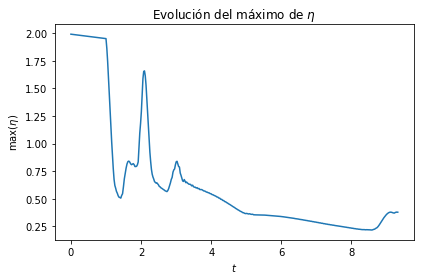

In [26]:
fig, ax = plt.subplots()
ax.plot(t, eta_max)
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$\max(\eta)$")
ax.set_title(r"Evolución del máximo de $\eta$")
plt.tight_layout()
plt.show()

### Salida 2D

Algunos archivos tienen salida bidimensional. 

In [27]:
!head eta.xy.asc

# 2D ASCII output created by CarpetIOASCII
#
0	0	0 0 0	0 0 0	0	-0.75 -0.75 0	0
0	0	0 0 0	1 0 0	0	-0.5 -0.75 0	0
0	0	0 0 0	2 0 0	0	-0.25 -0.75 0	0
0	0	0 0 0	3 0 0	0	0 -0.75 0	0
0	0	0 0 0	4 0 0	0	0.25 -0.75 0	0
0	0	0 0 0	5 0 0	0	0.5 -0.75 0	0
0	0	0 0 0	6 0 0	0	0.75 -0.75 0	0
0	0	0 0 0	7 0 0	0	1 -0.75 0	1.22203894451723e-307


Hay que comprender la salida. Vamos a ver qué representan cada columna. La columna 0 representa el número de iteración. Las columnas 5, 6, 7 son los índices en las tres direcciones x, y, z. Luego, la columna 8 es el valor del tiempo. Las columnas 9, 10, 11 son el valor de la malla en x, y, z. Finalmente, la columna 12 es el valor de la variable $\eta$.

In [28]:
# Vamos a leer todo el contenido a una variable llamada file_data.
file_data = np.genfromtxt("eta.xy.asc")

Tenemos un archivo de 13 columnas segúna la discusión anterior.

In [29]:
file_data.shape

(177419, 13)

Los distintos índices de iteraciones los obtenemos con el comando `np.unique` sobre la columna 0.

In [30]:
iters = np.unique(file_data[:, 0])
print "iteraciones = ", iters

iteraciones =  [  0.  30.  60.  90. 120. 150. 180. 210. 240. 270. 300.]


Como se puede ver, esto corresponde a la línea del archivo de parámetros

```
IOASCII::out2D_every = 30
```

Podemos hacer lo mismo para los valores de tiempo sabiendo que están en la octava columna.

In [31]:
time_data = np.unique(file_data[:, 8])
print "tiempos = ", time_data

tiempos =  [0.         1.70269494 2.3832615  3.09447993 3.83569407 4.66647604
 5.52703171 6.4237244  7.36584004 8.33433266 9.31945184]


Con lo anterior, vamos a a graficar las figuras con el siguiente mini-script.

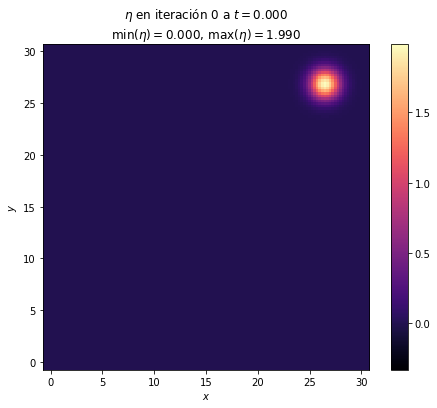

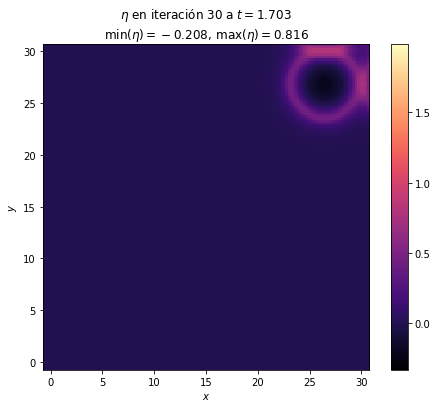

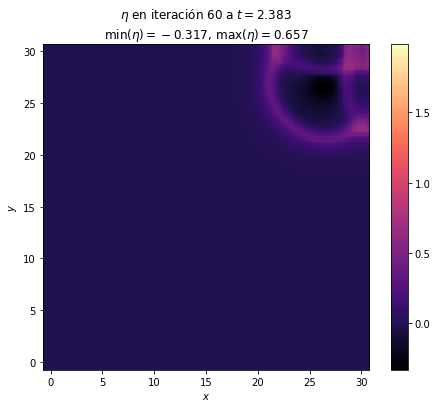

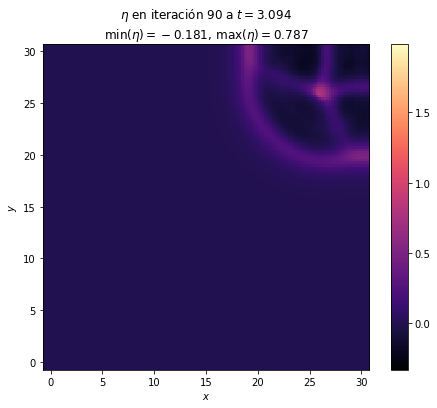

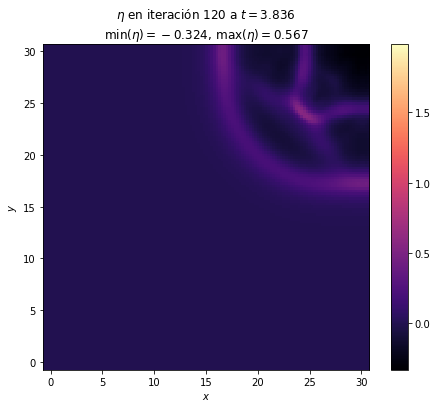

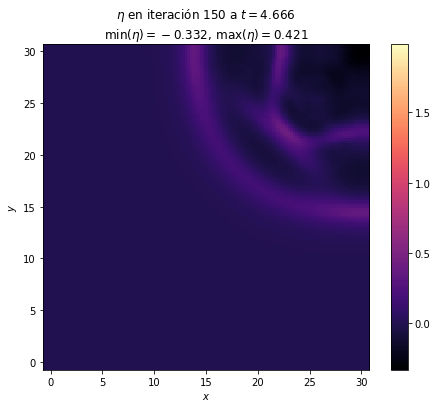

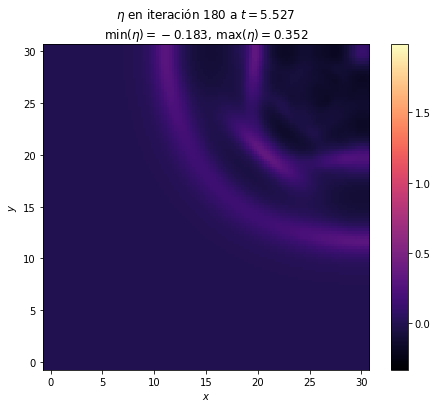

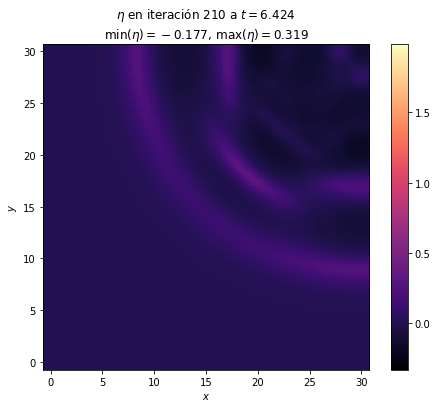

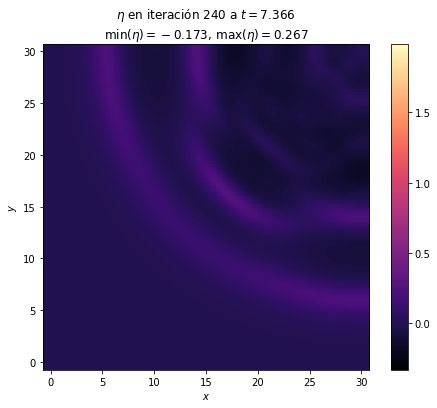

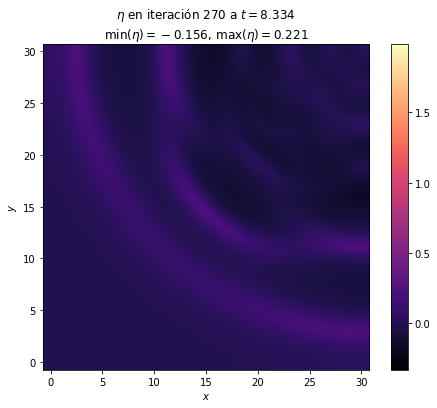

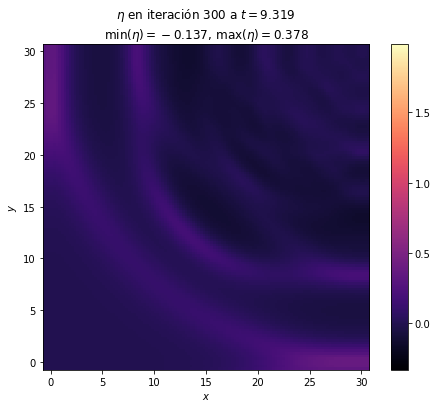

In [32]:
# Primero calcula máximo y mínimo global de toda la simulación.
eta_min, eta_max = np.min(file_data[:, 12]), np.max(file_data[:, 12])

# Vamos a graficar para cada iteración distinta.
for i in iters:
    # Empieza extrayendo información correspondiendte a la iteración actual.
    # Es decir, sólo queremos los datos para los cuales el número de iteración
    # es el correcto. Esto lo guardamos en la variable grid.
    grid = file_data[file_data[:,0] == i, :]
    
    # Ahora podemos extraer las coordenadas de la malla,
    x = grid[:,9]
    x_min, x_max = np.min(x), np.max(x)
    y = grid[:,10]
    y_min, y_max = np.min(y), np.max(y)
    
    # Y luego el valor de eta.
    eta = grid[:,12]
    
    # Hay que hacer de eta un arreglo bidimensional.
    # Necesitamos el número de elementos únicos en x y y.
    eta_2d = eta.reshape(len(np.unique(y)), len(np.unique(x)))
    
    # Genera la figura.
    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(eta_2d[:,:], cmap, clim=(eta_min, eta_max), origin='lower', extent = [x_min, x_max, y_min, y_max])
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$y$")
    ax.set_title(r"$\eta$ en iteración $%d$ a $t = %3.3f$" % (i, time_data[iters == i][0])  +  '\n' +  r"$\min(\eta) = %3.3f,\, \max(\eta) = %3.3f$" % (np.min(eta_2d), np.max(eta_2d)))
    plt.colorbar(im, ax = ax)
    plt.show()

### Ejercicios

* Experimenta correr el código con distintos números de procesos, hilos y averigua qué es ppn. Si no corres con los parámetros correctos para tu máquina, Cactus debería darte una advertencia. Consulta esta referencia para [ayuda](http://simfactory.org/info/documentation/userguide/processterminology.html).

* Corre el código a distintas resoluciones, en particular al doble y a la mitad. ¿Se hace la simulación hasta el mismo tiempo?

* Posiciona el paquete gaussiano en algún otro punto de la malla.

* Examina el directorio "configs/sim" y familiarízate con los contenidos de "OptionList", "RunScript", "SubmitScript", "ThornList". ¿Cómo cambiarías el nivel de optimización? ¿Cómo prenderías las opciones de debugging?

* Si quisieras hacer hacer un checkout de Cactus bajo otro directorio, ¿qué archivo necesitas modificar?